In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import metrics

In [16]:
with open(os.path.join("sim_results", "results.pkl"), "rb") as f:
    results = pickle.load(f)

for channel_code in results:
    BERs = list(results[channel_code][metrics.THROUGHPUT].keys())
    BERs.sort()

    for metric in metrics.metrics_list:
        results[channel_code][metric] = {BER: results[channel_code][metric][BER] for BER in BERs}


print(results)

{'None': {'Throughput': {0: [294.1995276452194], 1e-09: [294.1995276452194], 1e-06: [294.1995276452194], 0.0001: [283.6083446499915], 0.0002: [265.36797393598795], 0.001: [182.99210619532647], 0.1: [0.0], 1: [0.0]}, 'Data': {0: [63000.0], 1e-09: [63000.0], 1e-06: [63000.0], 0.0001: [60732.0], 0.0002: [56826.0], 0.001: [39186.0], 0.1: [0.0], 1: [0.0]}, 'Overhead': {0: [0.0], 1e-09: [0.0], 1e-06: [0.0], 0.0001: [0.0], 0.0002: [0.0], 0.001: [0.0], 0.1: [0.0], 1: [0.0]}, 'Energy Consumption': {0: [320.0336613508833], 1e-09: [320.0336613508833], 1e-06: [320.0336613508833], 0.0001: [320.0336613508833], 0.0002: [320.0336613508833], 0.001: [320.0336613508833], 0.1: [320.0336613508833], 1: [320.0336613508833]}, 'Energy Efficiency': {0: [196.85429255807912], 1e-09: [196.85429255807912], 1e-06: [196.85429255807912], 0.0001: [189.76753802598827], 0.0002: [177.56257188738738], 0.001: [122.44336997112522], 0.1: [0.0], 1: [0.0]}}, 'ReedSolomon': {'Throughput': {0: [279.35665728597513], 1e-09: [279.35

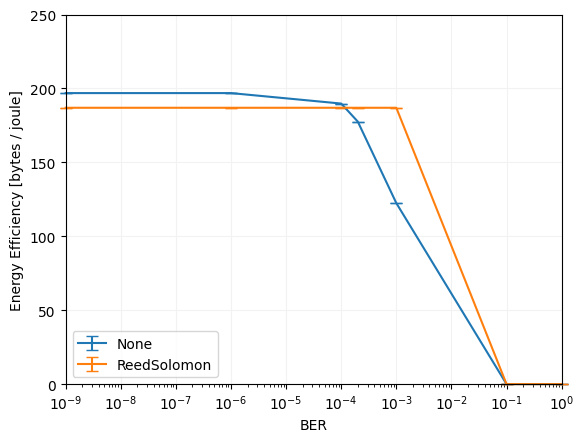

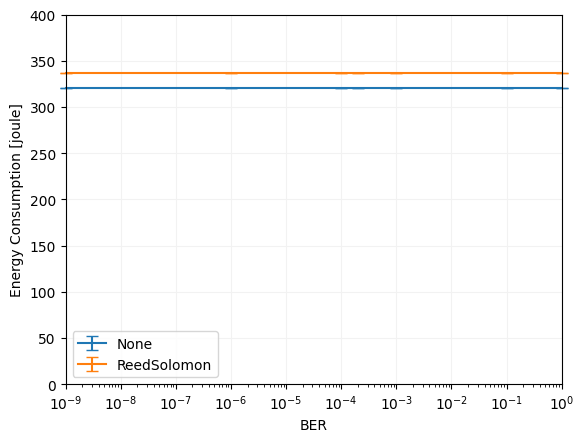

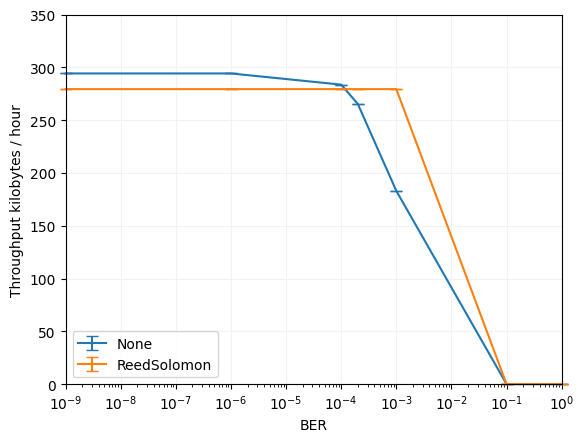

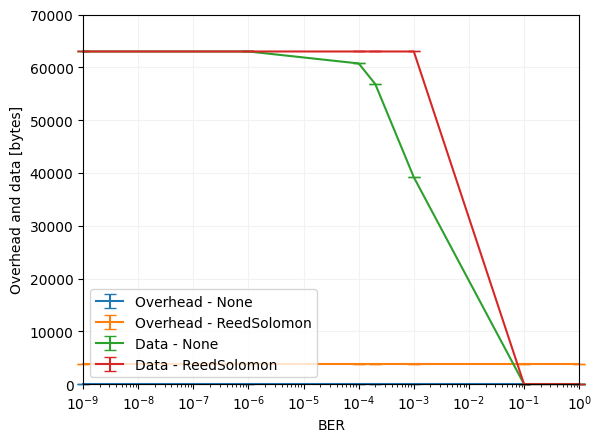

In [28]:
def plot_runs(metric_names, label, ylims, is_log=False, show_metric_name=False):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for metric in metric_names:
        for channel_code in results:
            x = list(results[channel_code][metric].keys())[1:]
            ys = [results[channel_code][metric][BER] for BER in x]
            y = [np.average(y) for y in ys]
            yerr = [np.std(y) for y in ys]

            key_label = channel_code if not show_metric_name else f"{metric} - {channel_code}"
            plt.errorbar(x, y, yerr=yerr, label=key_label, capsize=4, clip_on=False)

    plt.ylabel(label)
    plt.xlabel("BER")
    plt.legend(loc="lower left")
    plt.grid(linestyle='-', color='0.95')

    if is_log:
        plt.yscale("log")
    plt.xscale("log")
    
    plt.ylim(ylims[0], ylims[1])
    plt.xlim(min(x), max(x))

    # plt.savefig(os.path.join(output_dir, f"{label.replace(' ', '_').replace('/', '_')}.png"))
    plt.show()


metric = "Energy Efficiency"
plot_runs([metric], "Energy Efficiency [bytes / joule]", [0, 250])

metric = "Energy Consumption"
plot_runs([metric], "Energy Consumption [joule]", [0, 400])

metric = "Throughput"
plot_runs([metric], "Throughput kilobytes / hour", [0, 350])

plot_runs(["Overhead", "Data"], "Overhead and data [bytes]", [0, 70000], show_metric_name=True)